In [1]:
import dv_processing as dv
from snn_delays.snn_refactored import SNN
from snn_delays.utils.dataset_loader import DatasetLoader
from snn_delays.utils.train_utils_refact_minimal import train, get_device, propagate_batch_simple
from snn_delays.utils.test_behavior import tb_save_max_acc_refac

device = get_device()
dataset = 'davis'
total_time = 50
batch_size = 64
folder_name = 'AXO_handwritten'

# DATASET
DL = DatasetLoader(dataset=dataset,
                  caching='memory',
                  num_workers=0,
                  batch_size=batch_size,
                  total_time=total_time,
                  #sensor_size_to = 45,
                  sensor_size_to = 32,
                  folder_name = folder_name)
train_loader, test_loader, dataset_dict = DL.get_dataloaders()

Running on: cuda:0
[CenterCrop(sensor_size=(240, 180, 2), size=(128, 128)), Downsample(time_factor=1, spatial_factor=0.25, sensor_size=None, target_size=None), ToFrame(sensor_size=(32, 32, 2), time_window=None, event_count=None, n_time_bins=50, n_event_bins=None, overlap=0, include_incomplete=False)]


In [2]:
dataset_dict['time_ms'] = 50
dataset_dict

{'num_input': 2048,
 'num_training_samples': 6000,
 'num_output': 3,
 'dataset_name': 'davis',
 'time_ms': 50}

Delta t: 1.0 ms
SNN(
  (criterion): MSELoss()
  (layers): ModuleList(
    (0): FeedforwardSNNLayer(
      (linear): Linear(in_features=2048, out_features=48, bias=False)
    )
    (1): FeedforwardSNNLayer(
      (linear): Linear(in_features=48, out_features=48, bias=False)
    )
    (2): FeedforwardSNNLayer(
      (linear): Linear(in_features=48, out_features=3, bias=False)
    )
  )
)
Epoch [1/20], learning_rates 0.001000, 0.100000


c:\Users\Alberto\anaconda3\envs\deeplearning\lib\site-packages\torch\optim\lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Step [31/93], Loss: 0.22449
Step [62/93], Loss: 0.14523
Step [93/93], Loss: 0.12818
Time elasped: 30.959012746810913
3000
Test Loss: 0.16948789928821809
Avg spk_count per neuron for all 50 time-steps 421.09183333333334
Test Accuracy of the model on the test samples: 67.733

saving max acc: 67.73333333333333
Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\axo_1ms
Epoch [2/20], learning_rates 0.001000, 0.100000
Step [31/93], Loss: 0.09939
Step [62/93], Loss: 0.08581
Step [93/93], Loss: 0.09064
Time elasped: 19.274626970291138
3000
Test Loss: 0.11842627728239019
Avg spk_count per neuron for all 50 time-steps 481.3616666666667
Test Accuracy of the model on the test samples: 80.933

saving max acc: 80.93333333333334
Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\axo_1ms
Epoch [3/20], learning_rates 0.001000, 0.100000
Step [31/93], Loss: 0.05794
Step [62/93], Loss: 0.04814
Step [93/93], Loss: 0.03144
Time el

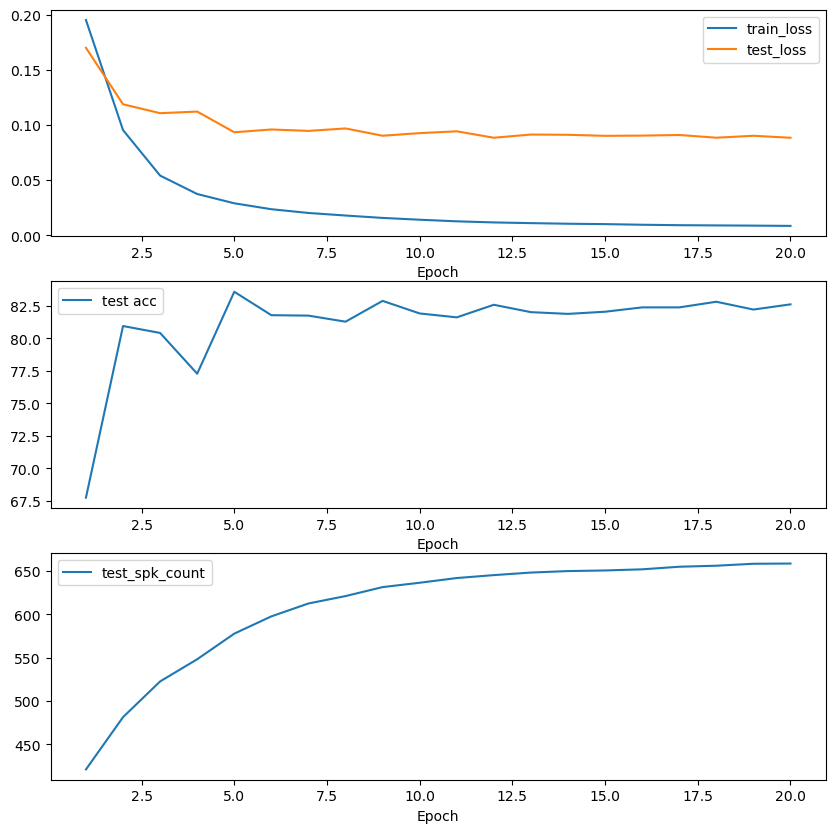

In [3]:
ckpt_dir = 'axo_1ms'

structure = (48, 2, 'f')

extra_kwargs = {}

tau_m = 5.0 

snn = SNN(dataset_dict=dataset_dict, structure=structure, tau_m=tau_m, win=total_time, loss_fn='spk_count', batch_size=batch_size, device=device, 
          **extra_kwargs)

#snn.input2spike_th = 0.5

snn.model_name = 'axo_f'
snn.set_layers()
snn.to(device)
print(snn)

num_epochs = 20
lr = 1e-3
train(snn, train_loader, test_loader, lr, num_epochs, ckpt_dir=ckpt_dir,
       test_behavior=tb_save_max_acc_refac, scheduler=(10, 0.95), test_every=1, freeze_taus=True)

Delta t: 1.0 ms
Delta t: 1.0 ms
Delta t: 1.0 ms
SNN(
  (criterion): MSELoss()
  (layers): ModuleList(
    (0): FeedforwardSNNLayer(
      (linear): Linear(in_features=2048, out_features=24, bias=False)
    )
    (1): FeedforwardSNNLayer(
      (linear): Linear(in_features=24, out_features=24, bias=False)
    )
    (2): FeedforwardSNNLayer(
      (linear): Linear(in_features=24, out_features=3, bias=False)
    )
  )
)
Epoch [1/20], learning_rates 0.001000, 0.100000
Step [31/93], Loss: 0.21991
Step [62/93], Loss: 0.18882
Step [93/93], Loss: 0.19235
Time elasped: 35.34282326698303
3000
Test Loss: 0.21310341009434233
Avg spk_count per neuron for all 50 time-steps 232.52266666666668
Test Accuracy of the model on the test samples: 49.267

saving max acc: 49.266666666666666
Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\axo_1ms
Epoch [2/20], learning_rates 0.001000, 0.100000
Step [31/93], Loss: 0.15091
Step [62/93], Loss: 0.17519
Step [93/93], Loss: 

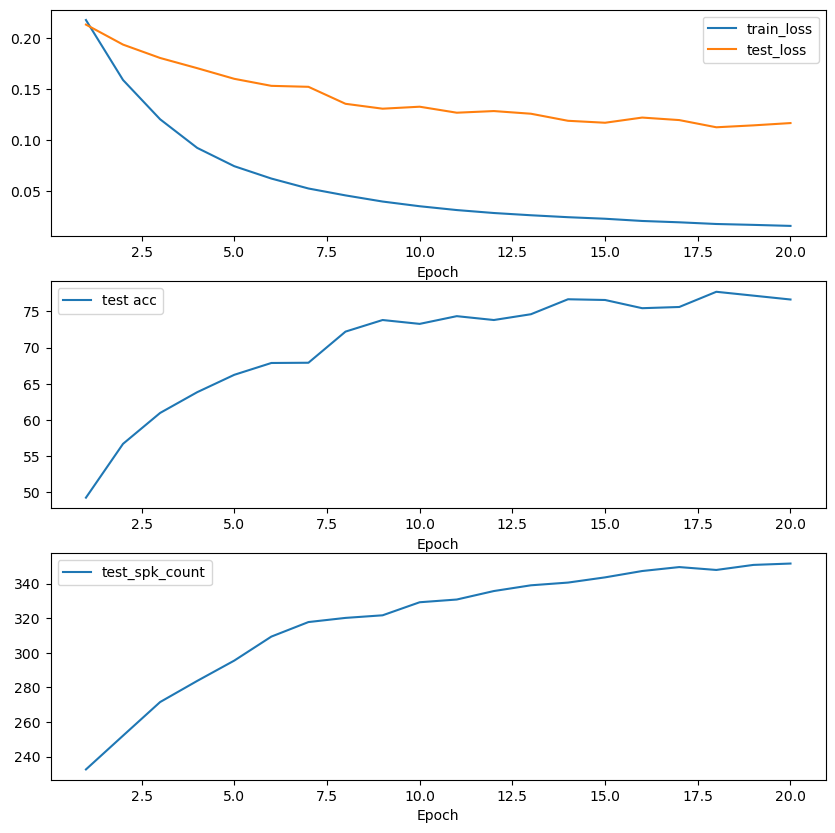

In [4]:
ckpt_dir = 'axo_1ms'

#structure = (64, 2, 'f')
structure = (24, 2, 'f')

extra_kwargs = {}

#tau_m = 50 # initial experiments
tau_m = 5.0 

snn = SNN(dataset_dict=dataset_dict, structure=structure, tau_m=tau_m, win=total_time, loss_fn='spk_count', batch_size=batch_size, device=device, 
          **extra_kwargs)

snn.input2spike_th = 0.5

snn.model_name = 'axo_f_binary'
snn.set_layers()
snn.to(device)
print(snn)

num_epochs = 20
lr = 1e-3
train(snn, train_loader, test_loader, lr, num_epochs, ckpt_dir=ckpt_dir,
       test_behavior=tb_save_max_acc_refac, scheduler=(10, 0.95), test_every=1, freeze_taus=True)

Delta t: 1.0 ms
Delta t: 1.0 ms
Delta t: 1.0 ms
Delta t: 1.0 ms
Delta t: 1.0 ms
SNN(
  (criterion): CrossEntropyLoss()
  (layers): ModuleList(
    (0): FeedforwardSNNLayer(
      (linear): Linear(in_features=2048, out_features=64, bias=False)
    )
    (1): FeedforwardSNNLayer(
      (linear): Linear(in_features=640, out_features=64, bias=False)
    )
    (2): FeedforwardSNNLayer(
      (linear): Linear(in_features=64, out_features=3, bias=False)
    )
  )
)
Epoch [1/20], learning_rates 0.001000, 0.100000
Step [31/93], Loss: 0.70188
Step [62/93], Loss: 0.67029
Step [93/93], Loss: 0.28422
Time elasped: 27.38512396812439
3000
Test Loss: 0.9891679857639556
Avg spk_count per neuron for all 50 time-steps 181.214
Test Accuracy of the model on the test samples: 71.767

saving max acc: 71.76666666666667
Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\axo_1ms
Epoch [2/20], learning_rates 0.001000, 0.100000
Step [31/93], Loss: 0.16997
Step [62/93], Loss:

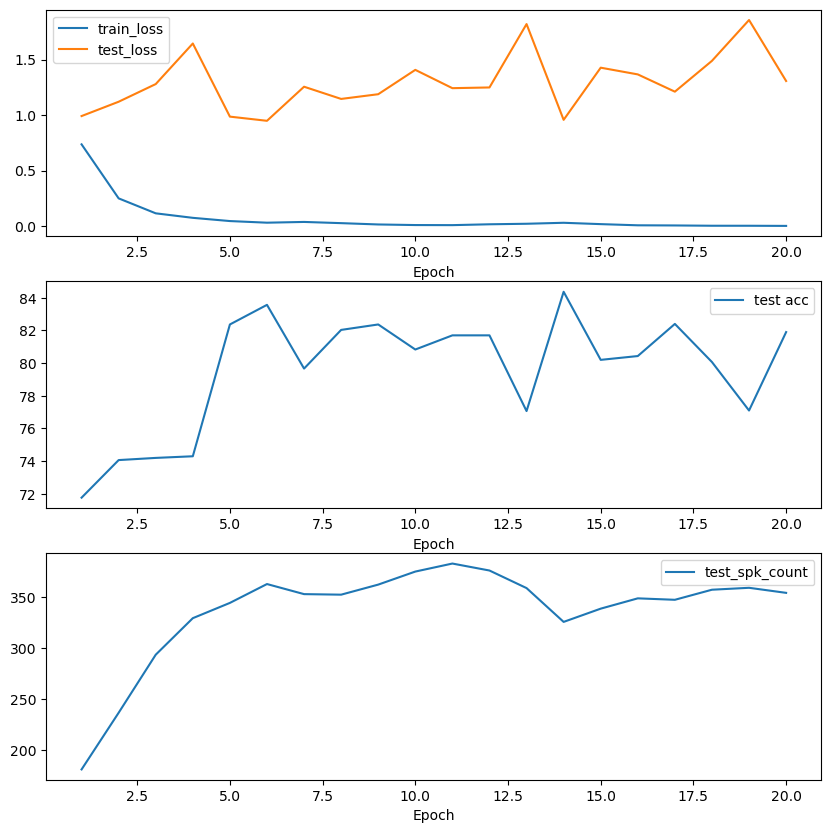

In [5]:
extra_kwargs = {'delay_range':(10, 1),
                'pruned_delays': 10}

snn_rd = SNN(dataset_dict, structure=(64, 2, 'd'), win=total_time, tau_m=1.0,
               loss_fn='mem_sum', batch_size=batch_size, device=device, debug=False, **extra_kwargs)

snn.input2spike_th = 0.5
snn_rd.model_name = 'axo_d10_binary'
snn_rd.set_layers()
snn_rd.to(device)

print(snn_rd)
train(snn_rd, train_loader, test_loader, lr, num_epochs, ckpt_dir=ckpt_dir,
       test_behavior=tb_save_max_acc_refac, scheduler=(10, 0.95), test_every=1, freeze_taus=True)